In [61]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
## New Delhi
df_NDLS = df_india[df_india['City'] == 'New Delhi']

df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [21]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [22]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [23]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [24]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=10)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

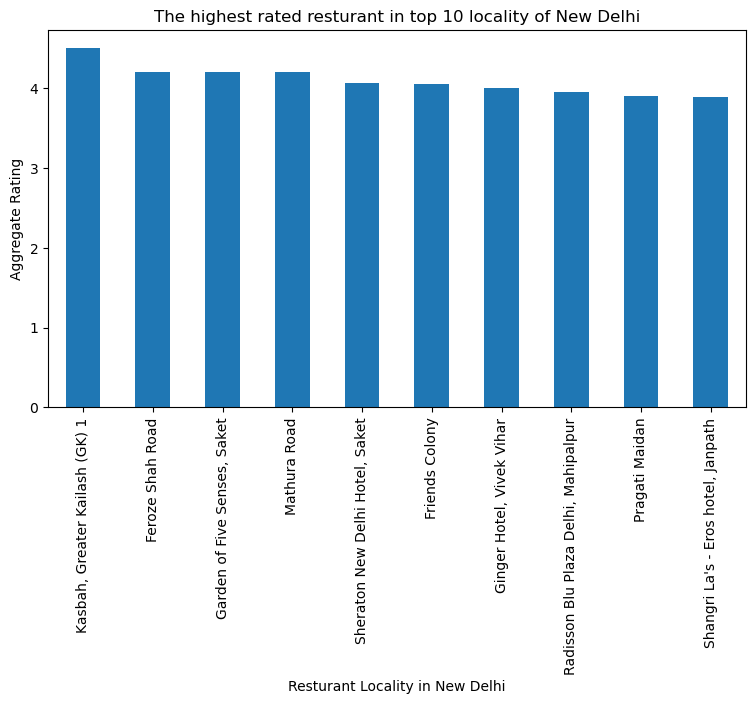

In [64]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

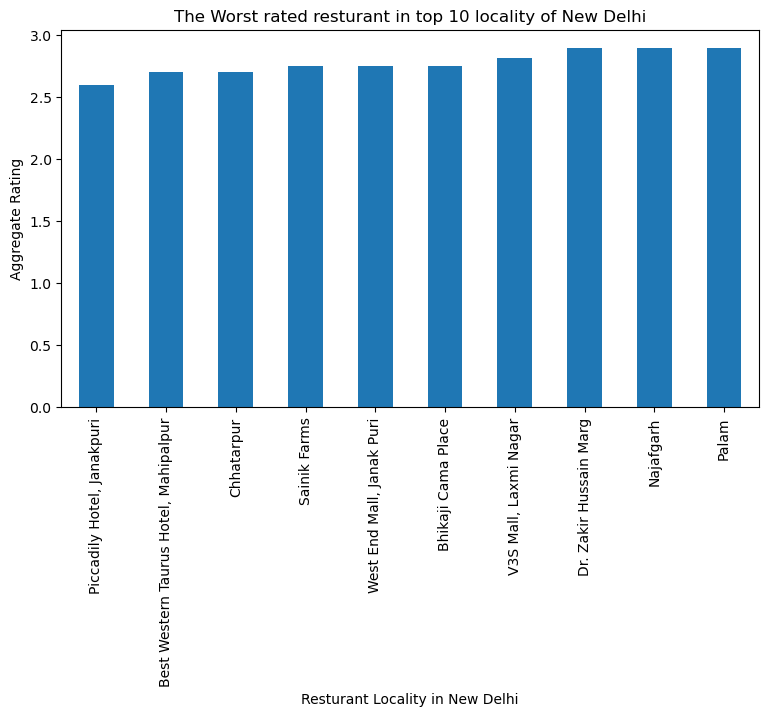

In [26]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

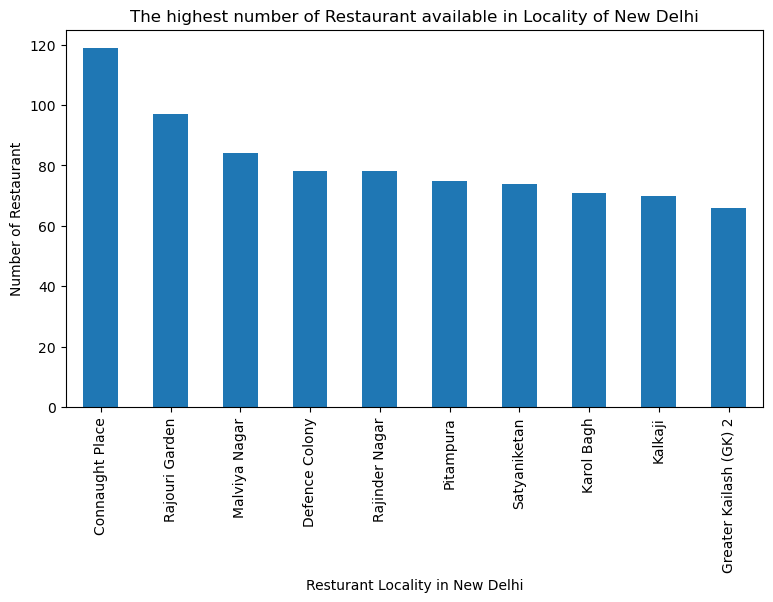

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

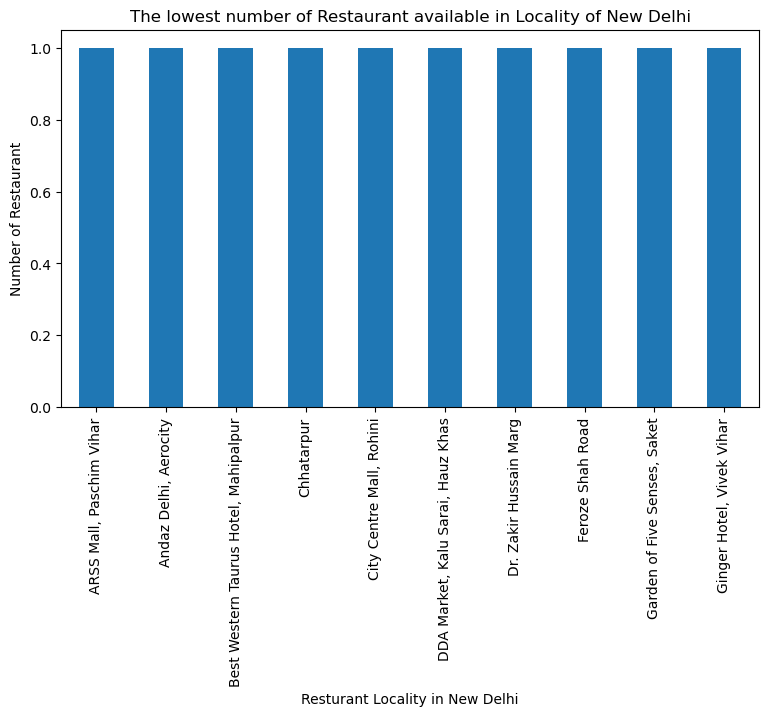

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

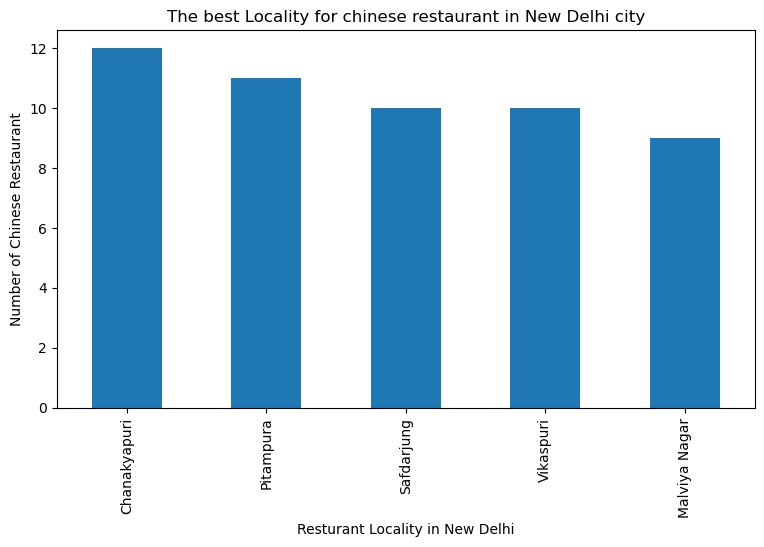

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

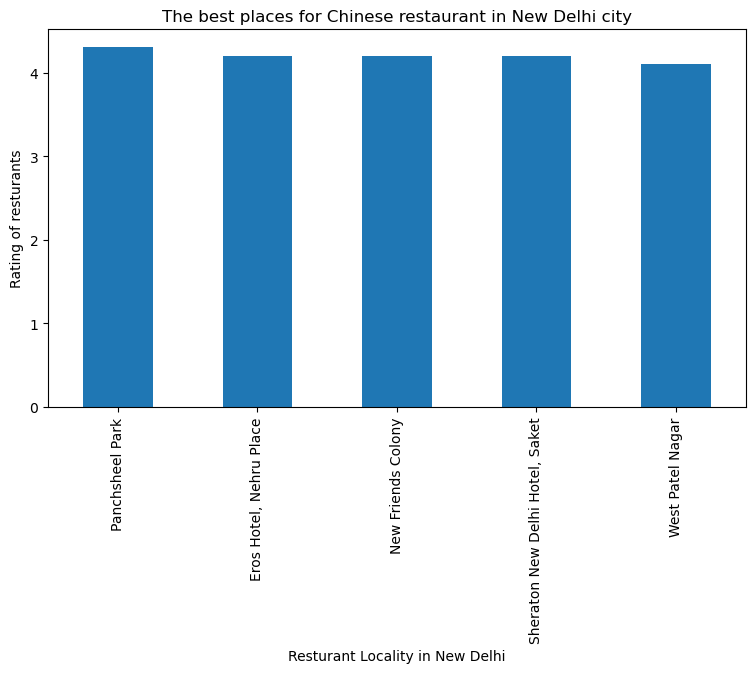

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [29]:

df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [30]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [34]:
CLIENT_ID = '0EXJ3K0ULNN42UGHU05MYFTSF2RSPGBQAMS042RL4EODRH33'
CLIENT_SECRET = 'KG1V01OAY1W4LNOU2HT3EG11QDIZXVUB5ZZ15IEQWVNJ5QAP'
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100
VERSION = '20190612' # Current date

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [36]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [37]:

new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [39]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 19                  19     19   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          31                  31     31   
Yusuf Sarai                                    12                  12     12   
ibis New Delhi, Aerocity                       31                  31     31   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              19               19   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       31               31   
Yusuf Sarai                                 12               12   
ibis New Delhi, Aerocity                    31               31   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              19  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       31  
Yusuf Sarai                                 12  
ibis New Delhi, Aerocity                    31  

[237 rows x 6 columns]

In [40]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [41]:

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  African Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                   0   
1  ARSS Mall, Paschim Vihar    0                  0                   0   
2  ARSS Mall, Paschim Vihar    0                  0                   0   
3  ARSS Mall, Paschim Vihar    0                  0                   0   
4  ARSS Mall, Paschim Vihar    0                  0                   0   

   Airport  Airport Food Court  Airport Lounge  Airport Service  \
0        0                   0               0                0   
1        0                   0               0                0   
2        0                   0               0                0   
3        0                   0               0                0   
4        0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Track Stadium  Trail  \
0                 0                    0  ...              0      0   
1                 0                    0  ...              0      0   
2                 0                    0  ...              0      0   
3                 0                    0  ...              0      0   
4                 0                    0  ...              0      0   

   Train Station  Turkish Restaurant  Udupi Restaurant  \
0              0                   0                 0   
1              0                   0                 0   
2              0                   0                 0   
3              0                   0                 0   
4              0                   0                 0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0                      0           0   
1                              0                      0           0   
2                              0                      0           0   
3                              0                      0           0   
4                              0                      0           0   

   Wings Joint  Women's Store  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 210 columns]

In [45]:
new_Delhi_venues.shape

(3232, 7)

In [47]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
232  West Gate Mall, Rajouri Garden  0.000000           0.000000   
233                West Patel Nagar  0.000000           0.000000   
234           Worldmark 1, Aerocity  0.000000           0.032258   
235                     Yusuf Sarai  0.000000           0.000000   
236        ibis New Delhi, Aerocity  0.000000           0.000000   

     African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0.0      0.0                 0.0        0.000000   
1                   0.0      0.0                 0.0        0.000000   
2                   0.0      0.0                 0.0        0.000000   
3                   0.0      0.0                 0.0        0.142857   
4                   0.0      0.0                 0.0        0.000000   
..                  ...      ...                 ...             ...   
232                 0.0      0.0                 0.0        0.000000   
233                 0.0      0.0                 0.0        0.000000   
234                 0.0      0.0                 0.0        0.000000   
235                 0.0      0.0                 0.0        0.000000   
236                 0.0      0.0                 0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  \
0                0.0          0.000000             0.000000  ...   
1                0.0          0.000000             0.000000  ...   
2                0.0          0.000000             0.000000  ...   
3                0.0          0.142857             0.000000  ...   
4                0.0          0.000000             0.000000  ...   
..               ...               ...                  ...  ...   
232              0.0          0.000000             0.052632  ...   
233              0.0          0.000000             0.000000  ...   
234              0.0          0.000000             0.000000  ...   
235              0.0          0.000000             0.000000  ...   
236              0.0          0.000000             0.000000  ...   

     Track Stadium  Trail  Train Station  Turkish Restaurant  \
0              0.0    0.0       0.000000                 0.0   
1              0.0    0.0       0.000000                 0.0   
2              0.0    0.0       0.000000                 0.0   
3              0.0    0.0       0.000000                 0.0   
4              0.0    0.0       0.000000                 0.0   
..             ...    ...            ...                 ...   
232            0.0    0.0       0.000000                 0.0   
233            0.0    0.0       0.000000                 0.0   
234            0.0    0.0       0.032258                 0.0   
235            0.0    0.0       0.000000                 0.0   
236            0.0    0.0       0.032258                 0.0   

     Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0.0                            0.0                    0.0   
1                 0.0                            0.0                    0.0   
2                 0.0                            0.0                    0.0   
3                 0.0                            0.0                    0.0   
4                 0.0                            0.0                    0.0   
..                ...                            ...                    ...   
232               0.0                            0.0                    0.0   
233               0.0                            0.0                    0.0   
234               0.0                           

In [48]:
New_Delhi_grouped.shape

(237, 210)

In [49]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café   0.4
1                Pub   0.2
2  Indian Restaurant   0.2
3        Coffee Shop   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2          Coffee Shop  0.14
3       Airport Lounge  0.14
4     Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store  0.25
1     Indian Restaurant  0.25
2  Fast Food Restaurant  0.25
3    Chinese Restaurant  0.25
4                   ATM  0.00


--

4   Asian Restaurant  0.17


----Gourmet Hub, Pashim Vihar----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2     Ice Cream Shop   0.2
3             Bakery   0.2
4  Food & Drink Shop   0.2


----Greater Kailash (GK) 1----
               venue  freq
0               Café  0.14
1             Market  0.09
2  Indian Restaurant  0.09
3              Hotel  0.05
4     Ice Cream Shop  0.05


----Greater Kailash (GK) 2----
                venue  freq
0  Chinese Restaurant  0.07
1         Coffee Shop  0.07
2      Sandwich Place  0.07
3  Italian Restaurant  0.07
4          Restaurant  0.07


----Greater Kailash (GK) 3----
               venue  freq
0         Restaurant  0.15
1               Café  0.15
2          BBQ Joint  0.08
3  Indian Restaurant  0.08
4     Sandwich Place  0.08


----Green Park----
               venue  freq
0  Indian Restaurant  0.19
1        Coffee Shop  0.19
2         Donut Shop  0.10
3        Pizza Place  0.10
4              Hotel  0.05



                     venue  freq
0        Indian Sweet Shop  0.33
1        Indian Restaurant  0.33
2       Light Rail Station  0.33
3                      ATM  0.00
4  North Indian Restaurant  0.00


----Mayapuri Phase 2----
                            venue  freq
0                          Garden  0.33
1                Business Service  0.33
2                      Restaurant  0.33
3                  Nightlife Spot  0.00
4  Multicuisine Indian Restaurant  0.00


----Mayur Vihar Phase 1----
                  venue  freq
0     Indian Restaurant   0.4
1                   ATM   0.2
2  Gym / Fitness Center   0.2
3           Pizza Place   0.2
4           Karaoke Bar   0.0


----Mayur Vihar Phase 2----
            venue  freq
0     Wings Joint  0.17
1       Juice Bar  0.17
2  Ice Cream Shop  0.17
3            Café  0.17
4  Sandwich Place  0.17


----Mayur Vihar Phase 3----
                     venue  freq
0                    Hotel   0.5
1  Health & Beauty Service   0.5
2                     

4       Pet Store  0.00


----Shahpur Jat----
                    venue  freq
0                     Bar  0.25
1   Australian Restaurant  0.12
2  Furniture / Home Store  0.12
3                 Stadium  0.12
4       Indian Restaurant  0.12


----Shakarpur----
           venue  freq
0          Diner  0.17
1  Shopping Mall  0.17
2            Gym  0.17
3  Train Station  0.17
4    Coffee Shop  0.17


----Shalimar Bagh----
                  venue  freq
0           Pizza Place  0.17
1     Convenience Store  0.17
2  Gym / Fitness Center  0.17
3                 Hotel  0.17
4           Coffee Shop  0.17


----Shangri La's - Eros hotel, Janpath----
                venue  freq
0               Hotel  0.20
1   Indian Restaurant  0.12
2          Restaurant  0.08
3  Italian Restaurant  0.08
4                 Spa  0.08


----Shanti Niketan Marg----
               venue  freq
0        Pizza Place  0.25
1       Gourmet Shop  0.25
2  Convenience Store  0.25
3               Café  0.25
4                ATM  

4                            Bar  0.14


----Vasant Square Mall, Vasant Kunj----
                           venue  freq
0                    Pizza Place  0.11
1                            Spa  0.11
2  Vegetarian / Vegan Restaurant  0.11
3           Fast Food Restaurant  0.11
4                           Café  0.11


----Vasant Vihar----
                  venue  freq
0                  Café  0.11
1  Fast Food Restaurant  0.07
2            Restaurant  0.07
3    Chinese Restaurant  0.07
4           Coffee Shop  0.07


----Vasundhara Enclave----
                            venue  freq
0                             ATM   0.5
1                     Snack Place   0.5
2                      Playground   0.0
3              Mughlai Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Vijay Nagar----
         venue  freq
0         Café  0.17
1  Coffee Shop  0.08
2       Bakery  0.08
3     Tea Room  0.08
4   Food Truck  0.08


----Vikas Marg----
           venue  freq
0   Burger Joint  0.2

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:

## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura    Chinese Restaurant   
..                              ...                   ...   
232  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
233                West Patel Nagar        Farmers Market   
234           Worldmark 1, Aerocity                 Hotel   
235                     Yusuf Sarai     Indian Restaurant   
236        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1       Indian Restaurant                   Pub   
2       Indian Restaurant         Shopping Mall   
3     Rental Car Location  Fast Food Restaurant   
4       Indian Restaurant  Fast Food Restaurant   
..                    ...                   ...   
232     Indian Restaurant                  Café   
233     Indian Restaurant           Pizza Place   
234                Lounge           Coffee Shop   
235           Coffee Shop                 Hotel   
236                Lounge           Coffee Shop   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                       Coffee Shop         Women's Store   
2                         Multiplex                 Hotel   
3                    Airport Lounge      Airport Terminal   
4                  Department Store                 Diner   
..                              ...                   ...   
232                     Pizza Place            Restaurant   
233                       Juice Bar                Bakery   
234                       Hotel Bar       Bed & Breakfast   
235                             Bar              Tea Room   
236                       Hotel Bar                Buffet   

    6th Most Common Venue   7th Most Common Venue      8th Most Common Venue  \
0      Chinese Restaurant                     ATM                Pizza Place   
1    Fast Food Restaurant     Fried Chicken Joint          French Restaurant   
2                    Café    Fast Food Restaurant          French Restaurant   
3             Coffee Shop      Frozen Yogurt Shop        Fried Chicken Joint   
4             Fish Market  Furniture / Home Store         Frozen Yogurt Shop   
..                    ...                     ...                        ...   
232            Shoe Store               Multiplex  Middle Eastern Restaurant   
233  Fast Food Restaurant     Fried Chicken Joint          French Restaurant   
234     Indian Restaurant      Punjabi Restaurant                       Café   
235      Asian Restaurant       Korean Restaurant                     Lounge   
236         Shopping Mall              Restaurant                       Café   

    9th Most Common Venue  10th Most Common Venue  
0                  Garden  Furniture / Home Store  
1              Food Truck              Food Court  
2              Food Truck              Food Court  
3       French Restaurant              Food Truck  
4     Fried Chicken Joint       French Restaurant  
..                    ...                     ...  
232         Shopping Mall              Hookah Bar  
233            Food Truck              Food Court  
234            Restaurant                  Buffet  
235   Japanese Restaurant                    Park  
236       Bed & Breakfast                     Spa  

[237 rows x 11 columns]

In [52]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(237,)

In [54]:
# add clustering labels
New_Delhi_merged = df_final.head(237)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

c:\users\hcl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               4   
3                         Average           59               1   
4                         Average          126               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel   Rental Car Location  Fast Food Restaurant   
4    Chinese Restaurant     Indian Restaurant  Fast Food Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop    Chinese Restaurant   
1                     Coffee Shop         Women's Store  Fast Food Restaurant   
2                       Multiplex                 Hotel                  Café   
3                  Airport Lounge      Airport Terminal           Coffee Shop   
4                Department Store                 Diner           Fish Market   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                     ATM           Pizza Place                Garden   
1     Fried Chicken Joint     French Restaurant            Food Truck   
2    Fast Food Restaurant     French Restaurant            Food Truck   
3      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
4  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

   10th Most Common Venue  
0  Furniture / Home Store  
1              Food Court  
2              Food Court  
3              Food Truck  
4       French Restaurant

In [55]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [56]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
9    28.659870    3.281481                              Average, Good   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
108  28.563827    3.800000                            Good, Very Good   
140  28.627959    3.004167                                    Average   
173  28.714176    3.352083             Average, Good, Poor, Very Good   
178  28.520095    3.256250             Average, Good, Poor, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
228  28.596073    3.052941                              Average, Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1           1560               0                  Café     Indian Restaurant   
9           1309               0                  Café                  Park   
86          4011               0                  Café                  Park   
108         1092               0                  Café     Indian Restaurant   
140          326               0     Indian Restaurant                  Café   
173         4514               0      Department Store  Fast Food Restaurant   
178         3917               0                  Café           Coffee Shop   
180          173               0                  Café         Women's Store   
228          305               0                   ATM           Snack Place   

    3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
1                     Pub             Coffee Shop           Women's Store   
9            Burger Joint           Burrito Place           Women's Store   
86                 Bakery                     Gym           Women's Store   
108                Market     Indie Movie Theater    Fast Food Restaurant   
140           Snack Place       Fish & Chips Shop  Furniture / Home Store   
173     Indian Restaurant           Shopping Mall      Frozen Yogurt Shop   
178           Pizza Place      Falafel Restaurant               Multiplex   
180      Department Store  Furniture / Home Store      Frozen Yogurt Shop   
228         Design Studio            Dessert Shop  Furniture / Home Store   

         6th Most Common Venue 7th Most Common Venue  \
1         Fast Food Restaurant   Fried Chicken Joint   
9                  Fish Market    Frozen Yogurt Shop   
86                 Fish Market    Frozen Yogurt Shop   
108                 Restaurant         Movie Theater   
140         Frozen Yogurt Shop   Fried Chicken Joint   
173        Fried Chicken Joint     French Restaurant   
178  Middle Eastern Restaurant                Bakery   
180        Fried Chicken Joint     French Restaurant   
228         Frozen Yogurt Shop   Fried Chicken Joint   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1              French Restaurant            Food Truck             Food Court  
9            Fried Chicken Joint     French Restaurant             Food Truck  
86           Fried Chicken Joint     French Restaurant             Food Truck  
108  Eastern European Restaurant    Frozen Yogurt Shop    Fried Chicken Joint  
140            French Restaurant            Food Truck             Food Court  
173                   Food Truck            Food Court      Food & Drink Shop  
178         Fast Food Restaurant    Light Rail Station                 Lounge  
180                   Food Truck            Food Court      Food & Drink Shop  
228            French Restaurant            Food Truck             Food Court

In [57]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
3    28.553077    3.200000                                    Average   
10   28.554807    3.000000                                    Average   
12   28.641698    3.050000                                    Average   
19   28.548827    2.700000                                    Average   
25   28.495624    2.700000                                    Average   
35   28.590297    3.350000                              Average, Good   
56   28.570246    4.050000                         Average, Excellent   
60   28.665829    4.000000                                  Very Good   
69   28.550327    3.300000                                    Average   
70   28.590654    3.550000                              Average, Good   
71   28.641003    3.650000                              Average, Good   
72   28.705700    3.350000                              Average, Good   
74   28.621267    3.416667                              Average, Good   
83   28.552895    3.300000                                    Average   
111  28.618772    3.666667                   Average, Good, Very Good   
112  28.552036    3.500000                                       Good   
119  28.545033    2.960000                              Average, Good   
128  28.608252    2.945000                              Average, Good   
145  28.525674    3.300000                                    Average   
148  28.642402    3.195652                              Average, Good   
160  28.712975    3.066667                                    Average   
161  28.639872    3.134483                        Average, Good, Poor   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
167  28.599082    2.900000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
195  28.527731    3.450000                              Average, Good   
203  28.601187    3.633333                              Average, Good   
209  28.631362    3.537500                              Average, Good   
211  28.579556    3.780000                                       Good   
215  28.605069    3.785714                   Average, Good, Very Good   
234  28.630044    2.750000                              Average, Poor   
236  28.648177    3.675000                   Average, Good, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
3             59               1                 Hotel   
10             4               1                 Hotel   
12            17               1                 Hotel   
19             9               1                 Hotel   
25            23               1   Japanese Restaurant   
35           127               1                 Hotel   
56          1949               1                 Hotel   
60           756               1                 Hotel   
69            30               1                 Hotel   
70           302               1                 Hotel   
71           367               1                 Hotel   
72           278               1                Garden   
74           475               1                 Hotel   
83            15               1                 Hotel   
111          725               1                 Hotel   
112           26               1                 Hotel   
119          259               1                 Hotel   
128          406               1                 Hotel   
145           27               1                   NaN   
148         2177               1         Shopping Mall   
160          121               1     Indian Restaurant   
161         1481               1  Fast Food Restaurant   
166         2772               1       Thai Restaurant   
167            9               1                   ATM   
172        25637               1                Bakery   
187          151    